In [1]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.08s). [brian2.stateupdaters.base.method_choice]


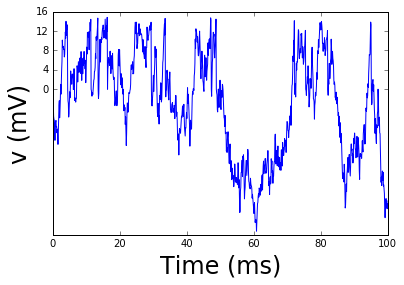

In [2]:
# This is just #1 - constant I(t) + refractoriness
start_scope()
N = 1 # number of neurons
tau_m = 10 * ms # membrane time constant
v_r = 0 * mV # reset potential
v_th = 15 * mV # threshold potential
I_c = 20 * mV # constant input current



eqs = '''
dv/dt = -(v-I)/tau_m : volt
I : volt
'''

lif = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r')
# You can add randomness in initial membrane potential by changing the following line

lif.v = v_r + 0 * mV * rand(len(lif))
lif.I = I_c

spikes = SpikeMonitor(lif)
v_trace = StateMonitor(lif, 'v', record=True)


run(0.1*second)
figure(1)
plot(v_trace.t/ms,v_trace.v[0]/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)',fontsize=24)
yticks([0,4,8,12,16])
show()
# plot the f-I curve for a LIF neuron with constant input

In [23]:
# This is just #2 - random I(t)
start_scope()
N = 1 # number of neurons
tau_m = 10 * ms # membrane time constant
v_r = 0 * mV # reset potential
v_th = 15 * mV # threshold potential
I_c = 20 * mV # constant input current



eqs = '''
dv/dt = -(v-I)/tau_m : volt
I = (15 + 5 * rand()) * mV : volt
'''

lif = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r')
# You can add randomness in initial membrane potential by changing the following line

lif.v = v_r + 0 * mV * rand(len(lif))

spikes = SpikeMonitor(lif)
v_trace = StateMonitor(lif, 'v', record=True)


run(0.1*second)
figure(1)
plot(v_trace.t/ms,v_trace.v[0]/mV)
xlabel('Time (ms)', fontsize=24)
ylabel('v (mV)',fontsize=24)
yticks([0,4,8,12,16])
show()
# plot the f-I curve for a LIF neuron with constant input

<spikemonitor.t: array([ 13.8,  27.7,  41.6,  55.5,  69.4,  83.3,  97.2]) * msecond>

In [21]:
# me trying to generate f-I graph for diff values of I and failing
# - Noah
data = []
for i in range(0,100):
    start_scope()
    G = NeuronGroup(N, model=eqs, threshold='v>v_th', reset='v=v_r')
    statemon = StateMonitor(G, 'v', record=0)
    spikemon = SpikeMonitor(G)
    
    G.v = v_r
    G.I = I_c * i/99
    
    run(100*ms)
    data.append([i, np.mean(spikemon.t[:]/second)])

INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'linear' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for g

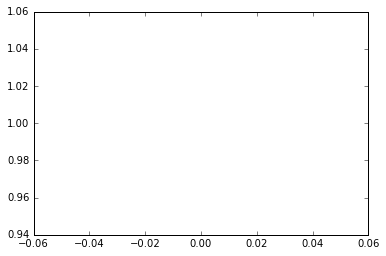

In [18]:
plot(data[:][0], data[:][1])

In [22]:
# my failure
print(data[0:10])

[[0, nan], [1, nan], [2, nan], [3, nan], [4, nan], [5, nan], [6, nan], [7, nan], [8, nan], [9, nan]]
